# PROJECT 4

Добавим необходимые библиотеки

In [1]:
import pandas as pd
from pandas import Series
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/test.csv
/kaggle/input/sf-dst-scoring/train.csv


Загрузим необходимые данные

In [2]:
train = pd.read_csv('/kaggle/input/sf-dst-scoring/train.csv')
test= pd.read_csv('/kaggle/input/sf-dst-scoring/test.csv')

# 1.Посмотрим на данные

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

Также, как и на платформе skillfactory есть пропуски в данных в столбце "education"  
Появились новые (дополнительные) данные: app_date, score_bki, region_rating, sna, first_time  
Описание данных к проекту:

client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия “хорошей” работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

In [5]:
train.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
47909,94613,10APR2014,GRD,F,23,N,N,1,0,-2.225004,1,50,1,1,10000,2,3,N,0
149,101725,18APR2014,UGR,F,25,N,N,0,0,-1.917058,3,50,2,3,40000,2,1,N,0
71548,11562,19JAN2014,SCH,M,51,Y,N,0,0,-2.279632,1,70,1,1,20000,1,2,N,0
25346,9124,16JAN2014,SCH,F,46,N,N,0,1,-2.518285,0,50,1,2,32000,1,4,N,0
10764,20644,28JAN2014,SCH,M,26,Y,N,0,0,-2.253374,2,50,2,2,20000,2,3,N,0


In [6]:
test.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
20959,53184,02MAR2014,UGR,M,60,N,N,0,0,-2.182589,2,70,1,2,30000,1,3,N
23555,8148,15JAN2014,SCH,F,52,N,N,0,1,-1.318951,2,80,2,3,27000,1,4,N
22688,89455,06APR2014,GRD,M,30,Y,Y,0,0,-2.604384,1,60,2,3,40000,2,3,N
8316,28047,04FEB2014,GRD,M,57,Y,Y,0,0,-1.441711,5,70,1,3,50000,1,3,N
6405,88317,04APR2014,SCH,F,32,N,N,3,0,-1.399919,7,60,2,3,25000,2,2,N


In [7]:
train.shape, test.shape

((73799, 19), (36349, 18))

В итоге у нас стало больше признаков, чем было на skillfactory (как и было обещано)  
19 в тренировочной и 18 в тестовой  

Объединим тестовый и тренировочный сеты длядальнейшей обработки

In [8]:
train['Train'] = 1 # помечаем где у нас трейн
test['Train'] = 0 # помечаем где у нас тест

df = train.append(test, sort=False).reset_index(drop=True) # объединяем

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

# 2.Предварительный анализ данных

Порядок следующий:
рассмотрим подробнее новые признаки  
заполним пропуски в столбце "education"  
сгруппируем все признаки по типу  
найдем выбросы в числовых признаках  
рассмотрим бинарные признаки  
рассмотрим категориальные признаки

Найдем выбросы. Но удалять их сразу не будем, посмотрим на результаты

# 2.1.app_date  
дата подачи заявки  

по виду мы понимаем, что это дата, но в формате object. Поменяем формат на дата

In [10]:
df.app_date = pd.to_datetime(df.app_date, format='%d%b%Y')
#test.app_date = pd.to_datetime(train.app_date, format='%d%b%Y')
print(df.app_date.sample(5))
#print(test.app_date.sample(5))

23550   2014-04-02
4580    2014-02-28
20839   2014-04-07
96702   2014-03-25
31433   2014-01-30
Name: app_date, dtype: datetime64[ns]


In [11]:
df.app_date.max(), #test.app_date.max()

(Timestamp('2014-04-30 00:00:00'),)

In [12]:
df.app_date.min(), #test.app_date.min()

(Timestamp('2014-01-01 00:00:00'),)

Судя по цифрам, данные у нас за период с 1 января по 30 апреля 2014 года  
Создадим дополнительные признаки: число дней от начала периода (1 января), месяц подачи заявки, день недели подачи заявки

In [13]:
min_day = df.app_date.min() 
df['days'] = (df.app_date - min_day).dt.days.astype('int')
#test['days'] = (test.app_date - min_day).dt.days.astype('int')

In [14]:
df['month'] = df.app_date.dt.month
#test['month'] = test.app_date.dt.month

In [15]:
df['weekday'] = df.app_date.dt.weekday
#test['weekday'] = test.app_date.dt.weekday

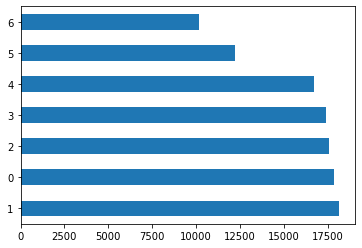

In [16]:
df['weekday'].value_counts().plot.barh()

в будние дни заявок больше, чем в выходные

In [ ]:
#train['month'].value_counts().plot.barh()

# 2.2. education

уровень образования

In [17]:
df.education = df.education.astype(str).apply(lambda x: None if x.strip()=='' else x)
#test.education = test.education.astype(str).apply(lambda x: None if x.strip()=='' else x)
df['education'].value_counts(), #test['education'].value_counts()

(SCH    57998
 GRD    34768
 UGR    14748
 PGR     1865
 nan      478
 ACD      291
 Name: education, dtype: int64,)

Пропуски заполним самым популярным значением

In [18]:
df.education = df.education.replace('nan', 'SCH') 
#test.education = test.education.replace('nan', 'SCH') 

In [19]:
df['education'] = df['education'].apply(lambda x: x.replace('SCH','1')) 
df['education'] = df['education'].apply(lambda x: x.replace('GRD','2')) 
df['education'] = df['education'].apply(lambda x: x.replace('UGR','3')) 
df['education'] = df['education'].apply(lambda x: x.replace('PGR','4')) 
df['education'] = df['education'].apply(lambda x: x.replace('ACD','5')) 

#test['education'] = test['education'].apply(lambda x: x.replace('SCH','1')) 
#test['education'] = test['education'].apply(lambda x: x.replace('GRD','2')) 
#test['education'] = test['education'].apply(lambda x: x.replace('UGR','3')) 
#test['education'] = test['education'].apply(lambda x: x.replace('PGR','4')) 
#test['education'] = test['education'].apply(lambda x: x.replace('ACD','5')) 

# 2.3.score_bki

скоринговый балл по данным из БКИ

In [20]:
df.score_bki.describe()

count    110148.000000
mean         -1.904535
std           0.499397
min          -3.624586
25%          -2.260434
50%          -1.920823
75%          -1.567888
max           0.199773
Name: score_bki, dtype: float64

In [ ]:
#train.score_bki.hist();

Найдем выбросы

In [21]:
def outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1  #находим межквартильное расстояние
    lower_bound = quartile_1 - (iqr * 1.5)  #нижняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)  #верхняя граница коробки
    return data[((data > upper_bound) | (data < lower_bound))]

In [22]:
len(outliers(df.score_bki))/len(df.score_bki), #len(outliers(test.score_bki))/len(test.score_bki)

(0.004702763554490322,)

Выбросов 0,4%. Удалять не будем, ухудшается ROC AUC

In [ ]:
#quartile_1, quartile_3 = np.percentile(df.score_bki, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#df = df.loc[df.score_bki.between(lower_bound, upper_bound)]

In [ ]:
#quartile_1, quartile_3 = np.percentile(test.score_bki, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.score_bki.between(lower_bound, upper_bound)]

Принцип формирования балла непонятен

# 2.4.region_rating

рейтинг региона

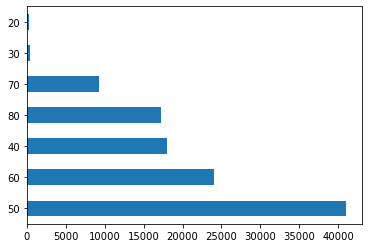

In [23]:
df['region_rating'].value_counts().plot.barh()

In [24]:
df['region_rating'].unique(), #test['region_rating'].unique()

(array([50, 80, 60, 40, 70, 20, 30]),)

Существует 7 видов регионов. Принцип определения рейтинга не понятен

# 2.5.sna

связь заемщика с клиентами банка

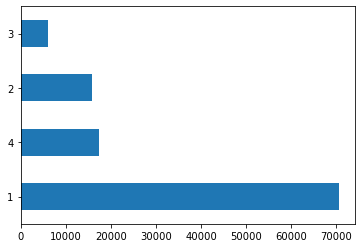

In [25]:
df['sna'].value_counts().plot.barh()

In [ ]:
#test['sna'].value_counts().plot.barh()

Существует 4 типа связи заяемщиков с клиентами банка

# 2.6.first_time

давность наличия информации о заемщике

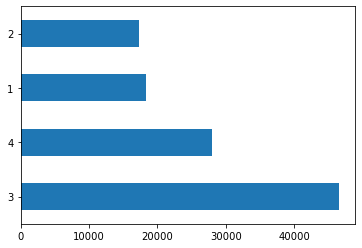

In [26]:
df['first_time'].value_counts().plot.barh()

In [ ]:
#train['first_time'].value_counts().plot.barh()

Существует 4 типа давности

# 2.7. Группировка данных по группам

Признаки сгруппируем по типу их обработки (категориальные, бинарные и числовые)

In [27]:
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['month', 'education', 'home_address', 'work_address', 'sna', 'first_time','weekday']
num_cols = ['days', 'age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']
num_cols_2 = ['days', 'age', 'decline_app_cnt', 'bki_request_cnt', 'region_rating', 'income']

# 2.8. Нумерические признаки

2.8.1. days

In [28]:
len(outliers(df.days))/len(df.days), #len(outliers(test.days))/len(test.days)

(0.0,)

Выбросов нет

2.8.2. age

In [29]:
len(outliers(df.age))/len(df.age), #len(outliers(test.age))/len(test.age)

(0.0,)

Выбросов нет

2.8.3.decline_app_cnt

In [30]:
len(outliers(df.decline_app_cnt))/len(df.decline_app_cnt), #len(outliers(test.decline_app_cnt))/len(test.decline_app_cnt)

(0.1695627700911501,)

Выбросов 17%

2.8.4. bki_request_cnt

In [31]:
len(outliers(df.bki_request_cnt))/len(df.bki_request_cnt), #len(outliers(test.bki_request_cnt))/len(test.bki_request_cnt)

(0.023931437702000943,)

Выбросов  2,5% . Удалять не будем, ухудшается ROC AUC

In [ ]:
#quartile_1, quartile_3 = np.percentile(df.bki_request_cnt, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#df = df.loc[df.bki_request_cnt.between(lower_bound, upper_bound)]

In [ ]:
#quartile_1, quartile_3 = np.percentile(test.bki_request_cnt, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.bki_request_cnt.between(lower_bound, upper_bound)]

2.8.5. income

In [32]:
len(outliers(df.income))/len(df.income), #len(outliers(test.income))/len(test.income)

(0.0635508588444638,)

Выбросов 6%. Удалять не будем, ухудшается ROC AUC

In [ ]:
#quartile_1, quartile_3 = np.percentile(df.income, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#df = df.loc[df.income.between(lower_bound, upper_bound)]

In [ ]:
#quartile_1, quartile_3 = np.percentile(test.income, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.income.between(lower_bound, upper_bound)]

Прологорифмируем признаки

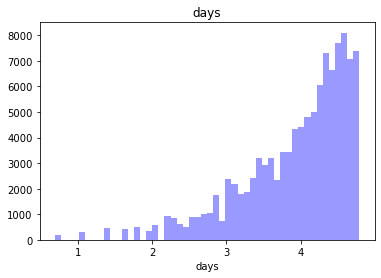

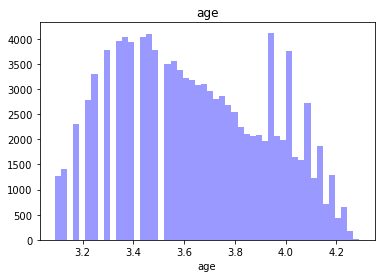

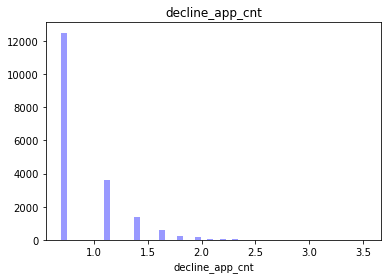

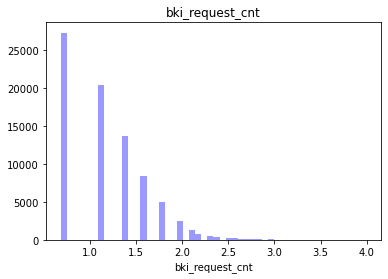

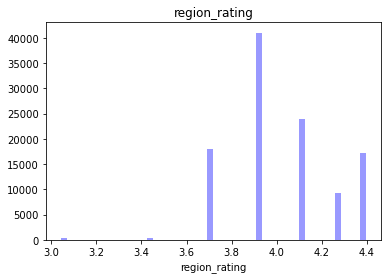

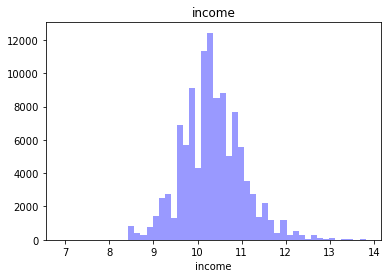

In [33]:
for i in num_cols_2:
 df[i] = np.log(df[i] + 1)
 plt.figure()
 sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False, color='b')
 plt.title(i)
 plt.show()

In [ ]:
#for i in num_cols_2:
# test[i] = np.log(test[i] + 1)
# plt.figure()
# sns.distplot(test[i][test[i] > 0].dropna(), kde = False, rug=False, color='b')
# plt.title(i)
# plt.show()

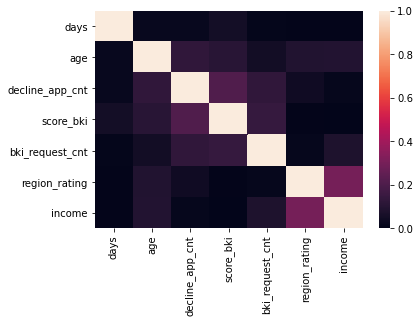

In [37]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

In [ ]:
#sns.heatmap(test[num_cols].corr().abs(), vmin=0, vmax=1)

коэффициенты корреляции небольшие. Берем в модель все признаки

# 2.9.Бинарные признаки

Переведем каждое значение бинарных признаков в уникальное число при помощи  LabelEncoder()

In [34]:
label_encoder = LabelEncoder()
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
#for column in bin_cols:
#    test[column] = label_encoder.fit_transform(test[column])  
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,work_address,income,sna,first_time,foreign_passport,default,Train,days,month,weekday
0,25905,2014-02-01,1,1,4.143135,1,1,0.000000,0,-2.008753,...,2,9.798183,4,1,0,0.0,1,3.465736,2,5
1,63161,2014-03-12,1,0,4.094345,0,0,0.000000,0,-1.532276,...,3,9.852247,4,1,0,0.0,1,4.262680,3,2
2,25887,2014-02-01,1,1,3.258097,1,0,1.098612,0,-1.408142,...,2,10.308986,1,4,1,0.0,1,3.465736,2,5
3,16222,2014-01-23,1,0,3.988984,0,0,0.000000,0,-2.057471,...,3,9.210440,1,3,0,0.0,1,3.135494,1,3
4,101655,2014-04-18,2,1,3.891820,0,0,0.000000,1,-1.244723,...,3,10.308986,1,4,1,0.0,1,4.682131,4,4


In [35]:
df[bin_cols].head()

,sex,car,car_type,good_work,foreign_passport
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,0,0,1,1


# 2.10.Категориальные признаки

Значимость категориальных признаков

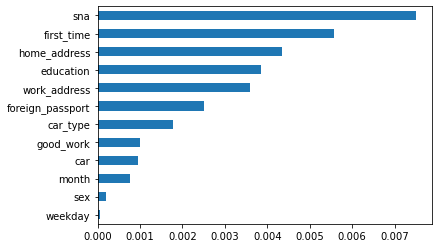

In [36]:
temp_df = df[df['Train']==1]
imp_cat = pd.Series(mutual_info_classif(temp_df[bin_cols + cat_cols],
                                        temp_df['default'], discrete_features =True),
                    index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Сымый важный признак sna

In [37]:
df = pd.get_dummies(df, prefix=cat_cols, columns=cat_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         110148 non-null  int64         
 1   app_date          110148 non-null  datetime64[ns]
 2   sex               110148 non-null  int64         
 3   age               110148 non-null  float64       
 4   car               110148 non-null  int64         
 5   car_type          110148 non-null  int64         
 6   decline_app_cnt   110148 non-null  float64       
 7   good_work         110148 non-null  int64         
 8   score_bki         110148 non-null  float64       
 9   bki_request_cnt   110148 non-null  float64       
 10  region_rating     110148 non-null  float64       
 11  income            110148 non-null  float64       
 12  foreign_passport  110148 non-null  int64         
 13  default           73799 non-null   float64       
 14  Trai

In [39]:
#x_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)
#x_cat_test = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

#print(x_cat.shape)
#print(x_cat_test.shape)

(110148, 30)


# 2.11. Числовые признаки

Значимость числовых признаков

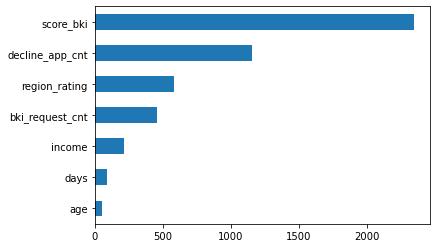

In [38]:
imp_num = Series(f_classif(temp_df[num_cols], temp_df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самый важный  числовой  признак score_bki

# 3.Машинное обучение

Стандартизируем числовые переменные

In [39]:
ss = StandardScaler()
df[num_cols] = pd.DataFrame(ss.fit_transform(df[num_cols]),columns = df[num_cols].columns)

In [45]:
#x_num = StandardScaler().fit_transform(df[num_cols])
#x_num_test = StandardScaler().fit_transform(test[num_cols])
#print(x_num)
#print(x_num_test)

[[-0.62629565  1.7140286  -0.41881524 ... -0.28179035 -0.43953103
  -0.78608043]
 [ 0.4605763   1.5428669  -0.41881524 ...  0.77056313 -0.43953103
  -0.70847239]
 [-0.62629565 -1.39079061  2.62166169 ... -0.28179035  1.61380664
  -0.05283405]
 ...
 [ 0.76873569 -0.66236702  2.62166169 ... -0.28179035 -0.43953103
   0.94213866]
 [-2.69903355 -1.13081103  1.49951212 ...  0.33379697  1.61380664
  -0.05283405]
 [ 0.55338759  0.03162921 -0.41881524 ...  0.33379697 -0.43953103
  -1.04778283]]


In [40]:
train = df.query('Train == 1').drop(['Train', 'client_id', 'app_date'], axis=1)
test2 = df.query('Train == 0').drop(['Train', 'app_date'], axis=1)
test = df.query('Train == 0').drop(['Train', 'client_id', 'app_date','default'], axis=1)

In [41]:
X = train.drop(['default'], axis=1)
y = train['default'].values

In [43]:
#X = np.hstack([x_num, train[bin_cols].values, x_cat])
#Y = train['default'].values
id_test = test2.client_id
#test = np.hstack([x_num_test, test[bin_cols].values, x_cat_test])

In [44]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Выполним регуляризацию. Поиск лучших гиперпараметров

In [45]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = ['balanced', None]

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty,class_weight=class_weight)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
#print('Лучшее solver:', best_model.best_estimator_.get_params()['solver'])
print('Лучшее class_weight:', best_model.best_estimator_.get_params()['class_weight'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/line

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/line

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

Лучшее Penalty: l2
Лучшее C: 7.742636826811269
Лучшее class_weight: None


Обучаем модель, генерируем результат и сравниваем с тестом

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


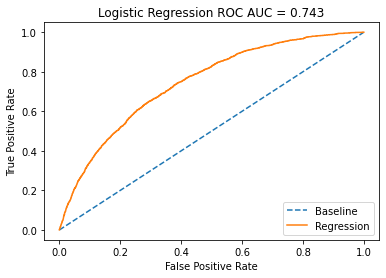

In [46]:
lgr = LogisticRegression(penalty = 'l2', C=7, class_weight='None', solver ='saga')
lgr.fit(X_train, y_train)
probs = lgr.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

ROC AUC = 0.743

Запишем рузультат на тестовых данных

In [50]:
lgr = LogisticRegression(penalty = 'l2', C=7, class_weight='None',solver ='saga')
lgr.fit(X, y)
probs = lgr.predict_proba(test)
probs = probs[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
my_submission = pd.DataFrame({'client_id': id_test, 
                            'default': probs})
my_submission.to_csv('submission.csv', index=False)

my_submission

ValueError: array length 14760 does not match index length 36349